<a href="https://colab.research.google.com/github/OJB-Quantum/QC-Hardware-How-to/blob/main/Fluxonium_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install ipyvuetify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.5 MB/s eta 0:00:00


In [7]:
!pip install ipywidgets

In [2]:
!pip install scqubits

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 29.0 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.7
    Uninstalling Cython-3.0.7:
      Successfully uninstalled Cython-3.0.7


# scqubits example: the fluxonium qubit
J. Koch and P. Groszkowski

For further documentation of scqubits see https://scqubits.readthedocs.io/en/latest/.

---

In [11]:
import numpy as np
import scqubits as scq

# Fluxonium qubit

$H_\text{fl}=-4E_\text{C}\partial_\phi^2-E_\text{J}\cos(\phi-\varphi_\text{ext}) +\frac{1}{2}E_L\phi^2$

**Creation via GUI** (ipywidgets needs to be installed for this to work.)

In [12]:
fluxonium = scq.Fluxonium.create()

For use with jupyter lab, additionally execute `jupyter labextension install jupyter-vuetify`.

 /usr/local/lib/python3.10/dist-packages/scqubits/utils/misc.py: 145

In [14]:
print(fluxonium)

Fluxonium-----------| [Fluxonium_4]
                    | EJ: 8.9
                    | EC: 2.5
                    | EL: 0.5
                    | flux: 0.0
                    | cutoff: 110
                    | truncated_dim: 10
                    |
                    | dim: 110



**Programmatic creation**

In [15]:
fluxonium2 = scq.Fluxonium(
    EJ=8.9,
    EC=2.5,
    EL=0.5,
    cutoff = 110,
    flux = 0.5
)

## Computing and visualizing spectra

In [16]:
fluxonium.eigenvals()

array([-2.7022458 ,  6.05619946,  6.27730681,  8.29978855, 14.23074422,
       16.86961382])

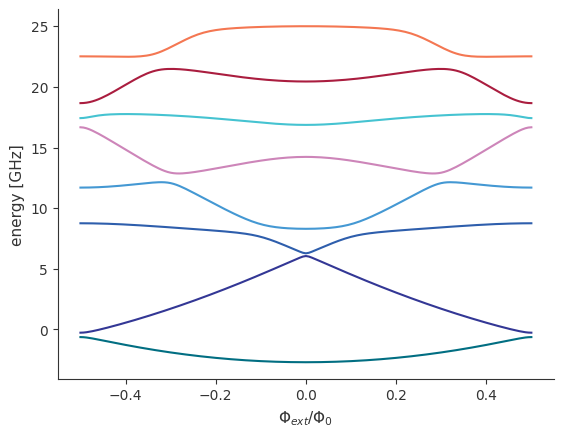

In [17]:
flux_list = np.linspace(-0.5, 0.5, 151)
fluxonium.plot_evals_vs_paramvals('flux', flux_list, evals_count=8);

In [18]:
fluxonium.cos_phi_operator()

array([[ 2.05740661e-01,  0.00000000e+00, -4.60050104e-01, ...,
         0.00000000e+00,  1.78616165e-61,  0.00000000e+00],
       [ 0.00000000e+00, -4.44868435e-01,  0.00000000e+00, ...,
        -6.10025949e-59,  0.00000000e+00,  1.86480751e-60],
       [-4.60050104e-01,  0.00000000e+00, -6.67742262e-02, ...,
         0.00000000e+00, -4.34635215e-58,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -6.10025949e-59,  0.00000000e+00, ...,
        -9.18367880e-02,  0.00000000e+00, -3.20968756e-02],
       [ 1.78616165e-61,  0.00000000e+00, -4.34635215e-58, ...,
         0.00000000e+00, -4.30134088e-02,  0.00000000e+00],
       [ 0.00000000e+00,  1.86480751e-60,  0.00000000e+00, ...,
        -3.20968756e-02,  0.00000000e+00, -1.10641059e-02]])

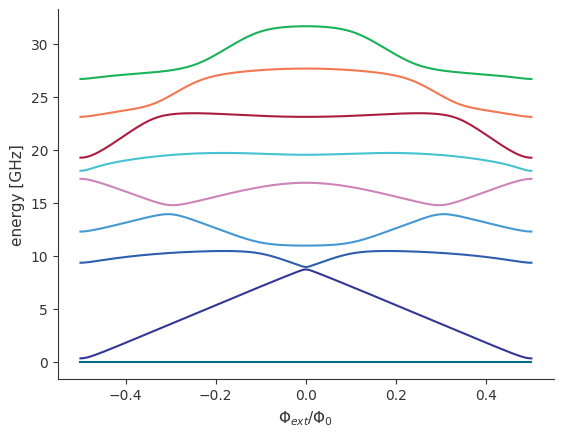

In [19]:
fluxonium.plot_evals_vs_paramvals('flux', flux_list, evals_count=9, subtract_ground=True);

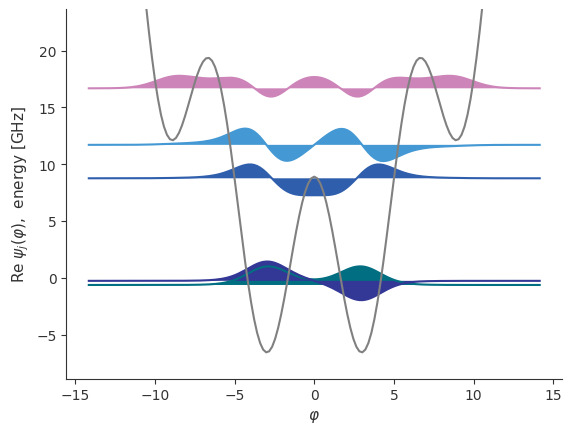

In [20]:
fluxonium.flux = 0.5
fluxonium.plot_wavefunction(esys=None, which=range(5), mode='real');

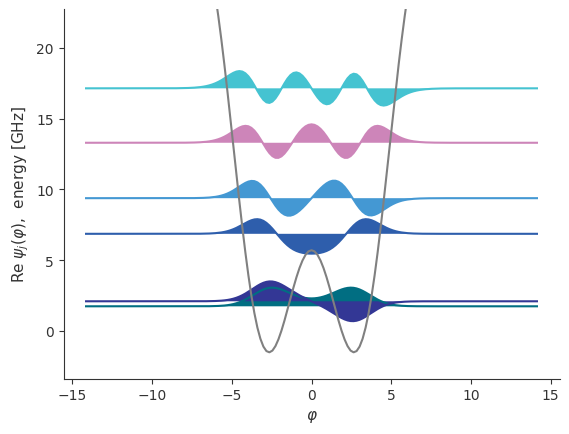

In [21]:
fluxonium = scq.Fluxonium(
    EJ=5.7,
    EC=1.2,
    EL=1.0,
    cutoff = 150,
    flux = 0.5
)
fig, axes=fluxonium.plot_wavefunction(esys=None, which=[0,1,2,3,4,5], mode='real');

## Matrix elements

In [22]:
phimat = fluxonium.matrixelement_table('phi_operator', evals_count=10)
print(phimat)

[[-2.34134190e-14 -2.42020774e+00  6.45548989e-15  5.96669304e-01
   1.92424514e-15 -1.26034410e-02  7.31749126e-16  1.05152531e-02
  -4.45241993e-16 -2.08796925e-03]
 [-2.42020774e+00  2.39071672e-14  1.16100233e+00 -2.78726136e-15
   1.98939356e-01 -1.31717780e-15  1.96392027e-02 -6.44908705e-16
  -1.88229452e-03 -1.79144226e-15]
 [ 6.45548989e-15  1.16100233e+00 -4.64160953e-16 -2.02810531e+00
  -1.38397953e-15  2.87499531e-01 -6.94237581e-18 -3.19256763e-02
  -2.51655509e-16  1.96457721e-04]
 [ 5.96669304e-01 -2.78726136e-15 -2.02810531e+00  2.98985200e-15
  -2.11221368e+00 -1.09868917e-15  1.78076985e-01 -2.70727653e-15
   4.52028150e-02 -7.46241842e-15]
 [ 1.92424514e-15  1.98939356e-01 -1.38397953e-15 -2.11221368e+00
  -1.59508169e-15  2.41344721e+00  1.39647373e-15  1.41490331e-01
   8.98123343e-17 -5.74957935e-02]
 [-1.26034410e-02 -1.31717780e-15  2.87499531e-01 -1.09868917e-15
   2.41344721e+00  2.94739514e-15 -2.65902027e+00  1.68514874e-15
   7.06894388e-02 -5.43778276e-15

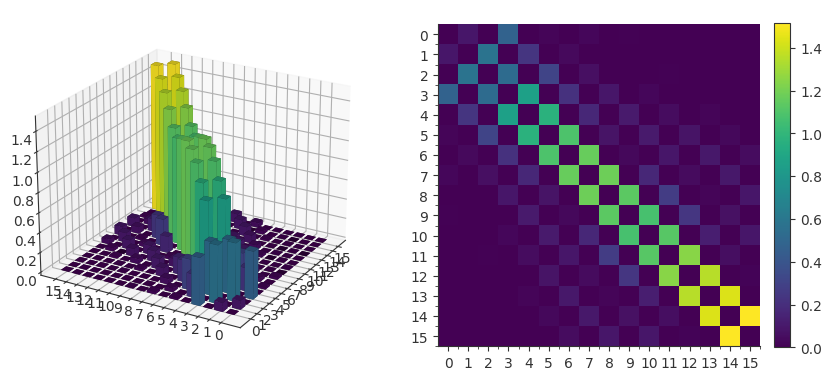

In [23]:
fluxonium.plot_matrixelements('n_operator', evals_count=16);

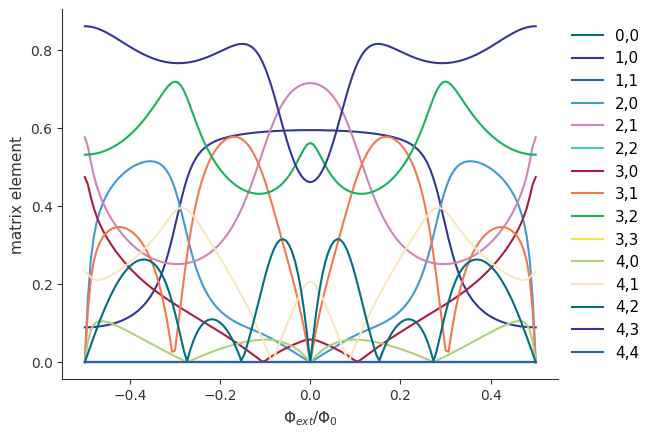

In [24]:
fluxonium.plot_matelem_vs_paramvals('n_operator', 'flux', flux_list, select_elems=5);